**Business Objective**

Rampant fraud in US healthcare system results in increased premiums for many vulnerable citizens who cannot afford to pay hefty price for a fundamental right such as healthcare. The aim is to find patterns of fraud commited by providers and train ML models to detect similar patterns in the future. Dataset for this capstone project is obtained from Kaggle [here](https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection/data).

---


Abuse in healthcare system can take many forms, such as:

*Billing for services that were not rendered.

*Duplicate submission of a claim for the same service.

*Charging for a more complex or expensive than was actually provided.

# Fetching Train and Test Files

In [319]:
import numpy as np
import pickle

In [320]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
!ls /content/drive/MyDrive/fourthbrain

dog_dataset				Train_Beneficiarydata-1542865627584.csv
Test-1542969243754.csv			Train_Inpatientdata-1542865627584.csv
Test_Beneficiarydata-1542969243754.csv	Train_Outpatientdata-1542865627584.csv
Test_Inpatientdata-1542969243754.csv	tweets.csv.gz
Test_Outpatientdata-1542969243754.csv	twitter-mask.png
Train-1542865627584.csv


In [322]:
import pandas as pd
import os
pathname = '/content/drive/MyDrive/fourthbrain'

train_df = pd.read_csv(os.path.join(pathname,'Train-1542865627584.csv'))
train_beneficiary_df = pd.read_csv(os.path.join(pathname,'Train_Beneficiarydata-1542865627584.csv'))
train_inpatient_df = pd.read_csv(os.path.join(pathname,'Train_Inpatientdata-1542865627584.csv'))
train_outpatient_df = pd.read_csv(os.path.join(pathname,'Train_Outpatientdata-1542865627584.csv'))

test_df = pd.read_csv(os.path.join(pathname,'Test-1542969243754.csv'))
test_beneficiary_df = pd.read_csv(os.path.join(pathname,'Test_Beneficiarydata-1542969243754.csv'))
test_inpatient_df = pd.read_csv(os.path.join(pathname,'Test_Inpatientdata-1542969243754.csv'))
test_outpatient_df = pd.read_csv(os.path.join(pathname,'Test_Outpatientdata-1542969243754.csv'))

# Data Engineering on Beneficiary Dataset

In [323]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [324]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [325]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [326]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

In [327]:
cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'] 

for col in cols:
  train_beneficiary_df.replace({col: 2}, 0, inplace=True)
  test_beneficiary_df.replace({col: 2}, 0, inplace=True)

In [328]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [329]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [330]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [331]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

## Person's Age on Train dataset

In [332]:
train_beneficiary_df['DOB'] = pd.to_datetime(train_beneficiary_df['DOB'], format = '%Y-%m-%d')
train_beneficiary_df['DOD'] = pd.to_datetime(train_beneficiary_df['DOD'], format = '%Y-%m-%d') 
train_beneficiary_df['Age'] = round((train_beneficiary_df['DOD'] - train_beneficiary_df['DOB']).dt.days/365) 

In [333]:
train_beneficiary_df['Age'].isna().sum(), train_beneficiary_df.shape[0]

(137135, 138556)

**Take-away message**

There are 1421 beneficiaries still alive and we need to calculate their age as well. 

In [334]:
train_beneficiary_df['DOD'].max()

Timestamp('2009-12-01 00:00:00')

**Take-away message**
Beneficiary data was last recorded on 2009-12-01, so we can calculate age of people that are still alive based on this date. 

In [335]:
train_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - train_beneficiary_df['DOB']).dt.days)/365), inplace=True)

In [336]:
train_beneficiary_df.Age.isna().sum()

0

## Person's Age on Test dataset

In [337]:
test_beneficiary_df['DOB'] = pd.to_datetime(test_beneficiary_df['DOB'], format = '%Y-%m-%d')
test_beneficiary_df['DOD'] = pd.to_datetime(test_beneficiary_df['DOD'], format = '%Y-%m-%d') 
test_beneficiary_df['Age'] = round((test_beneficiary_df['DOD'] - test_beneficiary_df['DOB']).dt.days/365)

In [338]:
test_beneficiary_df['Age'].isna().sum(), test_beneficiary_df.shape[0]


(63394, 63968)

In [339]:
63968 - 63394 

574

**Take-away message**

In the test dataset, there are 574 beneficiaries that are still alive. We'll calculate their age based on the last recorded date. 

In [340]:
test_beneficiary_df['DOD'].max()


Timestamp('2009-12-01 00:00:00')

In [341]:
test_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - test_beneficiary_df['DOB']).dt.days)/365), inplace=True)


In [342]:
test_beneficiary_df.Age.isna().sum()


0

## Add dead flag column

In [343]:
train_beneficiary_df.shape

(138556, 26)

In [344]:
train_beneficiary_df['DOD'].isna().sum(), train_beneficiary_df['DOD'].notna().sum()

(137135, 1421)

In [345]:
train_beneficiary_df.loc[train_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
train_beneficiary_df.loc[train_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [346]:
train_beneficiary_df['DeadOrNot'].value_counts()

0.0    137135
1.0      1421
Name: DeadOrNot, dtype: int64

In [347]:
test_beneficiary_df.shape

(63968, 26)

In [348]:
test_beneficiary_df['DOD'].isna().sum(), test_beneficiary_df['DOD'].notna().sum()


(63394, 574)

In [349]:
test_beneficiary_df.loc[test_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
test_beneficiary_df.loc[test_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

In [350]:
test_beneficiary_df['DeadOrNot'].value_counts()

0.0    63394
1.0      574
Name: DeadOrNot, dtype: int64

# Data Engineering for in-patient dataset

**Calculating Admitted Days**

Creating a new feature 'AdmittedDays' based on AdmissionDt and DischargeDt

In [351]:
train_inpatient_df['AdmissionDt'] = pd.to_datetime(train_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
train_inpatient_df['DischargeDt'] = pd.to_datetime(train_inpatient_df['DischargeDt'], format='%Y-%m-%d')
train_inpatient_df['AdmittedDays'] = round((train_inpatient_df['DischargeDt'] - train_inpatient_df['AdmissionDt']).dt.days + 1) 
                                           
test_inpatient_df['AdmissionDt'] = pd.to_datetime(test_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
test_inpatient_df['DischargeDt'] = pd.to_datetime(test_inpatient_df['DischargeDt'], format='%Y-%m-%d')
test_inpatient_df['AdmittedDays'] = round((test_inpatient_df['DischargeDt'] - test_inpatient_df['AdmissionDt']).dt.days + 1)

In [352]:
train_inpatient_df['AdmittedDays'].isna().sum()

0

In [353]:
test_inpatient_df['AdmittedDays'].isna().sum()

0

# Merging Inpatient and Outpatient dataset

In [354]:
key_columns_to_merge = list(train_outpatient_df.columns)
key_columns_to_merge

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [355]:
train_merged_patient_data = train_inpatient_df.merge(train_outpatient_df, on=key_columns_to_merge, how='outer')
train_merged_patient_data.shape

(558211, 31)

In [356]:
key_columns_to_merge_test = list(test_outpatient_df.columns)
key_columns_to_merge_test

['BeneID',
 'ClaimID',
 'ClaimStartDt',
 'ClaimEndDt',
 'Provider',
 'InscClaimAmtReimbursed',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'ClmAdmitDiagnosisCode']

In [357]:
test_merged_patient_data = test_inpatient_df.merge(test_outpatient_df, on=key_columns_to_merge_test, how='outer')
test_merged_patient_data.shape

(135392, 31)

# Merging Beneficiary with All-patient data

In [358]:
trainAllPatientDetailsData = train_merged_patient_data.merge(train_beneficiary_df, on='BeneID', how='inner')
trainAllPatientDetailsData.shape

(558211, 57)

In [359]:
testAllPatientDetailsData = test_merged_patient_data.merge(test_beneficiary_df, on='BeneID', how='inner')
testAllPatientDetailsData.shape

(135392, 57)

# Merging all-patients data with provider data with fraud label

In [360]:
trainAllPatientDetailsProvider = trainAllPatientDetailsData.merge(train_df, on='Provider', how='inner')
trainAllPatientDetailsProvider.shape

(558211, 58)

In [361]:
testAllPatientDetailsProvider = testAllPatientDetailsData.merge(test_df, on='Provider', how='inner')
testAllPatientDetailsProvider.shape

(135392, 57)

In [362]:
test_columns = list(testAllPatientDetailsProvider.columns)

In [363]:
train_columns = trainAllPatientDetailsProvider.columns

In [364]:
[test for test in train_columns if test not in test_columns]

['PotentialFraud']

In [365]:
test_df.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


# Missing value information in final dataset

In [366]:
trainAllPatientDetailsProvider.isna().sum()*100/len(trainAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                

In [367]:
testAllPatientDetailsProvider.isna().sum()*100/len(testAllPatientDetailsProvider)

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
AdmissionDt                         92.945669
ClmAdmitDiagnosisCode               73.886197
DeductibleAmtPaid                    0.144765
DischargeDt                         92.945669
DiagnosisGroupCode                  92.945669
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                

# Feature Engineering

In [368]:
pd.set_option('display.max_columns', None)
trainAllPatientDetailsProvider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmittedDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,13.0,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,19.0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,5.0,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes


In [369]:
columns_to_remove = ['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
                     'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                     'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                     'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                     'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                     'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                     'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                     'ClmAdmitDiagnosisCode', 'AdmissionDt',
                     'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
                     'State', 'County']

train_final = trainAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
train_final.shape

(558211, 27)

In [370]:
train_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
AdmittedDays                       517737
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [371]:
test_final = testAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
test_final.shape

(135392, 26)

In [372]:
test_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     196
AdmittedDays                       125841
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [373]:
train_final.Gender = train_final.Gender.astype('category')
train_final.Race = train_final.Race.astype('category')

In [374]:
test_final.Gender = test_final.Gender.astype('category')
test_final.Race = test_final.Race.astype('category')

## One-hot encoding

In [375]:
train_final = pd.get_dummies(train_final, columns=['Gender', 'Race'], drop_first=True)
train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes,0,0,0,0
1,PRV55912,50,0.0,NaN,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes,0,0,0,0
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes,1,0,0,0
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes,0,0,0,0
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes,1,0,0,0


In [376]:
train_final.loc[train_final['PotentialFraud'] == 'Yes', 'PotentialFraud'] = 1
train_final.loc[train_final['PotentialFraud'] == 'No', 'PotentialFraud'] = 0

In [377]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

In [378]:
test_final = pd.get_dummies(test_final, columns=['Gender', 'Race'], drop_first=True)
test_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5
0,PRV57070,9000,1068.0,8.0,Y,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,82.0,0.0,1,0,0,0
1,PRV57070,3000,1068.0,3.0,0,12,12,1,1,1,0,1,1,1,1,0,1,0,8000,2136,2540,1880,83.0,0.0,1,0,0,0
2,PRV57070,7000,1068.0,7.0,Y,12,12,0,1,1,0,1,0,0,1,1,0,0,10200,2136,40,100,82.0,0.0,1,0,0,0
3,PRV57070,5000,1068.0,9.0,0,12,12,0,0,1,0,1,0,0,1,1,0,0,5000,1068,600,180,95.0,0.0,1,0,0,0
4,PRV57070,9000,1068.0,11.0,Y,12,12,1,1,1,1,1,0,1,1,0,1,0,9000,1068,10,40,76.0,0.0,1,0,0,0


In [379]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [380]:
train_final.loc[train_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [381]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
1    109848
Name: RenalDiseaseIndicator, dtype: int64

In [382]:
test_final.loc[test_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [383]:
test_final['RenalDiseaseIndicator'].value_counts()

0    109143
1     26249
Name: RenalDiseaseIndicator, dtype: int64

In [384]:
train_final['DeductibleAmtPaid'].fillna(0, inplace=True)
train_final['AdmittedDays'].fillna(0, inplace=True)

In [385]:
train_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
PotentialFraud                     0
Gender_2                           0
Race_2                             0
R

In [386]:
test_final['DeductibleAmtPaid'].fillna(0, inplace=True)
test_final['AdmittedDays'].fillna(0, inplace=True)

In [387]:
test_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
Gender_2                           0
Race_2                             0
Race_3                             0
R

In [388]:
train_final['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

## Check for correlated columns

In [389]:
train_final.shape

(558211, 29)

In [390]:
cor = train_final.corr() 

keep_columns = np.full(cor.shape[0], True) 

for i in range(cor.shape[0]-1):
  for j in range(i+1, cor.shape[0]-1):
    if (np.abs(cor.iloc[i,j]) >= 0.8):
      keep_columns[i] = False 

#selected_columns = train_final.columns[keep_columns]

keep_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [391]:
test_final.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

## New features for better predictions

In [392]:
train_final['InscClaimReimbursement_ProviderAvg'] = train_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')
test_final['InscClaimReimbursement_ProviderAvg'] = test_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')

In [393]:
train_final['DeductibleAmtPaid_ProviderAvg'] = train_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')
test_final['DeductibleAmtPaid_ProviderAvg'] = test_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')

In [394]:
train_final['IPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')
test_final['IPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')

In [395]:
train_final['IPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')
test_final['IPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')

In [396]:
train_final['OPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')
test_final['OPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')

In [397]:
train_final['OPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')
test_final['OPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')

# Train & validation split

In [398]:
train_final_groupby = train_final.groupby(['Provider', 'PotentialFraud'], as_index = False).agg('sum')

train_final_groupby.shape

(5410, 34)

In [399]:
test_final_groupby = test_final.groupby(['Provider'], as_index=False).agg('sum')
test_final_groupby.shape

(1353, 33)

In [400]:
test_final_groupby.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot', 'Gender_2', 'Race_2',
       'Race_3', 'Race_5', 'InscClaimReimbursement_ProviderAvg',
       'DeductibleAmtPaid_ProviderAvg', 'IPAnnualReimbursementAmt_ProviderAvg',
       'IPAnnualDeductibleAmt_ProviderAvg',
       'OPAnnualReimbursementAmt_ProviderAvg',
       'OPAnnualDeductibleAmt_ProviderAvg'],
      dtype='object')

In [401]:
X = train_final_groupby.drop(columns=['Provider', 'PotentialFraud'], axis=1)
y = train_final_groupby['PotentialFraud']
y = y.astype('int')

In [402]:
train_final_groupby.shape

(5410, 34)

In [403]:
test_final_groupby.shape

(1353, 33)

In [404]:
train_final_groupby.loc[train_final_groupby['Provider'] == 'PRV51003'].head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0


In [200]:
train_final_groupby['Provider'].value_counts()

PRV51001    1
PRV55516    1
PRV55527    1
PRV55525    1
PRV55523    1
           ..
PRV53246    1
PRV53245    1
PRV53244    1
PRV53243    1
PRV57763    1
Name: Provider, Length: 5410, dtype: int64

**Standard Scaler**


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_minmax = scaler.fit_transform(X) # Train dataset
X_test = scaler.transform(test_final_groupby.iloc[:, 1:]) # Test dataset

**Train and validation split**

In [ ]:
from sklearn.model_selection import train_test_split

# Stratify = y will ensure equal number of potential fraud cases in train and validation dataset 
X_train, X_val, y_train, y_val = train_test_split(X_minmax, y, test_size=0.3, random_state=2022, stratify=y, shuffle=True)

In [ ]:
print(f'X train dataset: {X_train.shape}')
print(f'y train dataset: {y_train.shape}')

X train dataset: (3787, 32)
y train dataset: (3787,)


In [ ]:
print(f'X validation dataset: {X_val.shape}')
print(f'y validation dataset: {y_val.shape}')

X validation dataset: (1623, 32)
y validation dataset: (1623,)


In [ ]:
X_val[0,:]

array([-0.31897753, -0.31732824, -0.31190787, -0.21248512, -0.21257621,
       -0.34340524, -0.19485988, -0.12278404, -0.25557352, -0.23252876,
       -0.18599364, -0.20315994, -0.21607582, -0.1953917 , -0.33266682,
       -0.38630658, -0.05298077, -0.25966756, -0.18723404, -0.18039556,
       -0.22352393, -0.32994963, -0.26495847, -0.35820504, -0.17022483,
       -0.19598378, -0.31897753, -0.31732824, -0.31897753, -0.31732824,
       -0.31897753, -0.31732824])

# Model I: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

In [ ]:
%%time
#lr = LogisticRegression(featuresCol=selected_columns, labelCol='Purchase', maxIter=10)
lr = LogisticRegressionCV(cv=10, class_weight='balanced', random_state=2022)
lr_model = lr.fit(X_train, y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

CPU times: user 5.16 s, sys: 3.79 s, total: 8.95 s
Wall time: 4.8 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Predict probabilities for X_train and X_val
lr_train_pred_probability = lr.predict_proba(X_train)
lr_val_pred_probability = lr.predict_proba(X_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


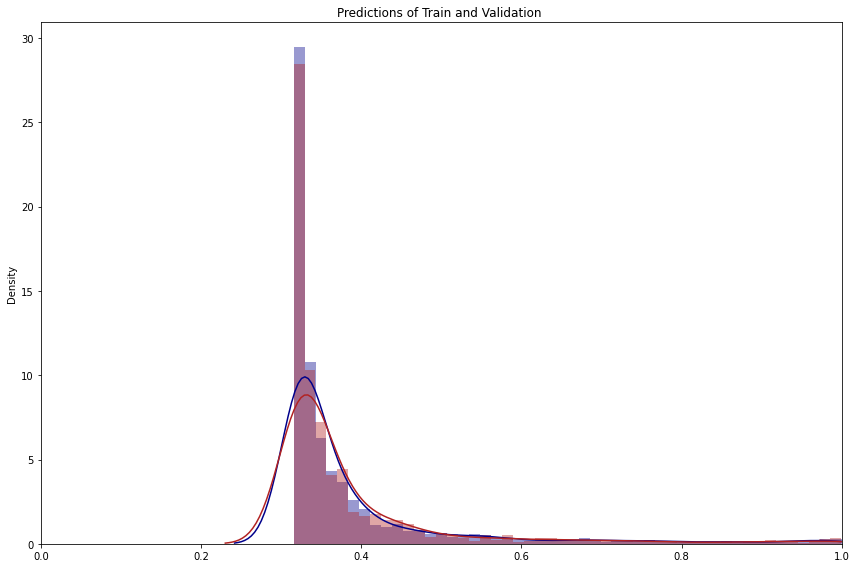

In [ ]:
# Lets compare model prediction performance on train and Validation both.
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,8))

sns.distplot(lr.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(lr.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()

plt.show()

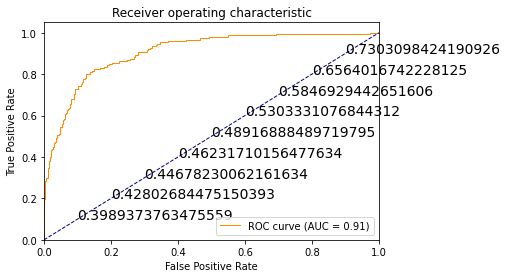

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val,lr.predict_proba(X_val)[:,1])         
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Precision Vs Recall')

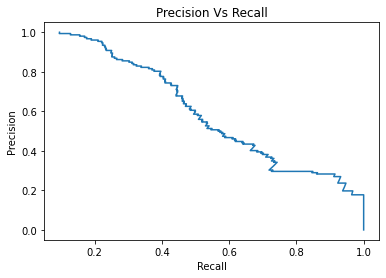

In [ ]:
## Lets Check precision and recall 
precision, recall, _ = precision_recall_curve(y_val, lr.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

In [ ]:
lr_train_pred_60=(lr.predict_proba(X_train)[:,1]>0.60).astype(bool)
lr_val_pred_60=(lr.predict_proba(X_val)[:,1]>0.60).astype(bool)   # set threshold as 0.60

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity

from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc

cm0 = confusion_matrix(y_train, lr_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

cm1 = confusion_matrix(y_val, lr_val_pred_60,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('Accuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, lr_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, lr_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, lr_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, lr_val_pred_60))

Confusion Matrix Train : 
 [[ 171  183]
 [  89 3344]]
Confusion Matrix Val: 
 [[  68   84]
 [  41 1430]]
Accuracy Train:  0.9281753366781094
Accuracy Val:  0.9229821318545902
Sensitivity Train :  0.4830508474576271
Sensitivity Val:  0.4473684210526316
Specificity Train:  0.9740751529274687
Specificity Val:  0.9721278042148198
Kappa Value : 0.48042984426340773
AUC         : 0.7097481126337257
F1-Score Train  :  0.5570032573289903
F1-Score Val  :  0.521072796934866


# Model II: Support Vector Machines

In [ ]:
%%time
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=0, tol=1e-5) # YOUR CODE HERE 
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_val)

CPU times: user 555 ms, sys: 8.8 ms, total: 564 ms
Wall time: 553 ms


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

def display_metrics(y_true, y_pred):
    print(f"Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.3f}")
    print(f"Accuracy: {accuracy(y_true, y_pred):.3f}")
    print(f"Recall: {recall(y_true, y_pred):.3f}")
    print(f"Precision: {precision(y_true, y_pred):.3f}")

In [ ]:
display_metrics(y_val, svm_pred)

Confusion Matrix: 
[[1454   17]
 [  96   56]]
F1 Score: 0.498
Accuracy: 0.930
Recall: 0.368
Precision: 0.767


# Model III: Gradient Boosting Classifier

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42) # YOUR CODE HERE
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_val)

CPU times: user 922 ms, sys: 51.6 ms, total: 974 ms
Wall time: 1.07 s


In [ ]:
display_metrics(y_val, gbt_pred)

Confusion Matrix: 
[[1401   70]
 [  60   92]]
F1 Score: 0.586
Accuracy: 0.920
Recall: 0.605
Precision: 0.568


In [ ]:
pickle.dump(gbt_model, open('gbt_model.pkl', 'wb'))

# SHAP Explanability

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.9 MB/s eta 0:00:00


In [ ]:
import shap
X_train_summary = shap.kmeans(X_train, 10)

In [ ]:
explainer = shap.KernelExplainer(gbt_model.predict, X_train_summary)

In [ ]:
%%time
shap_values = explainer.shap_values(y_val.iloc[0, :]) # YOUR CODE HERE

IndexingError: ignored

# Auto - ML

In [ ]:
pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=80862fd0daa54a058ea94907d0d6c96467309fcedeffd23c1c63f5b23c024402
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                      scoring='f1',# YOUR CODE HERE
                      verbosity=2,
                      random_state=42)
tpot.fit(X_train, y_train)
print(f"Tpop score on test data: {tpot.score(X_val, y_val):.2f}")
tpot.export('tpot_electronics_pipeline.py')

Optimization Progress:   0%|          | 0/176 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6303894859857846

Generation 2 - Current best internal CV score: 0.6303894859857846

Generation 3 - Current best internal CV score: 0.6312479724249798

Generation 4 - Current best internal CV score: 0.6312536623329061

Generation 5 - Current best internal CV score: 0.6392562906783898

Generation 6 - Current best internal CV score: 0.6392562906783898

Generation 7 - Current best internal CV score: 0.6392562906783898

Generation 8 - Current best internal CV score: 0.6392562906783898

Generation 9 - Current best internal CV score: 0.6392562906783898

Generation 10 - Current best internal CV score: 0.6428878657623389

Best pipeline: XGBClassifier(GradientBoostingClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=3, min_samples_leaf=18, min_samples_split=20), learning_rate=1.0, max_depth=1, max_features=0.6000000000000001, min_samples_leaf=19, min_samples_split=5, n_estimators=100, subsample=0.7000000000000001), lea

# Auto-Encoders

**Applying Principal Component Analysis**

In [461]:
train_final_groupby.head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,5,10,9,21,23,6,8,6,440150,22428,65380,11598,2221.0,0.0,16.0,4.0,0.0,0.0,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0
2,PRV51004,0,52170,310.0,0.0,1768,1782,64,88,50,16,41,63,105,108,49,46,17,648430,64808,327040,92790,12232.0,1.0,103.0,24.0,5.0,0.0,52170.0,310.0,648430.0,64808.0,327040.0,92790.0
3,PRV51005,1,280910,3700.0,0.0,13872,13910,426,680,507,165,295,485,799,895,344,331,124,4221950,441724,2457840,741323,93714.0,4.0,654.0,262.0,10.0,0.0,280910.0,3700.0,4221950.0,441724.0,2457840.0,741323.0
4,PRV51007,0,33710,3264.0,19.0,852,852,26,40,22,12,16,29,49,51,21,22,12,219600,32040,124540,33820,5699.0,1.0,38.0,14.0,0.0,0.0,33710.0,3264.0,219600.0,32040.0,124540.0,33820.0


In [462]:
train_final_groupby.iloc[:,2:].head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
0,104640,5340.0,30.0,300,300,15,19,17,5,10,9,21,23,6,8,6,440150,22428,65380,11598,2221.0,0.0,16.0,4.0,0.0,0.0,104640.0,5340.0,440150.0,22428.0,65380.0,11598.0
1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0
2,52170,310.0,0.0,1768,1782,64,88,50,16,41,63,105,108,49,46,17,648430,64808,327040,92790,12232.0,1.0,103.0,24.0,5.0,0.0,52170.0,310.0,648430.0,64808.0,327040.0,92790.0
3,280910,3700.0,0.0,13872,13910,426,680,507,165,295,485,799,895,344,331,124,4221950,441724,2457840,741323,93714.0,4.0,654.0,262.0,10.0,0.0,280910.0,3700.0,4221950.0,441724.0,2457840.0,741323.0
4,33710,3264.0,19.0,852,852,26,40,22,12,16,29,49,51,21,22,12,219600,32040,124540,33820,5699.0,1.0,38.0,14.0,0.0,0.0,33710.0,3264.0,219600.0,32040.0,124540.0,33820.0


In [463]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_pca = sc.fit(train_final_groupby.iloc[:,2:])
train_final_groupby_scaled = sc_pca.transform(train_final_groupby.iloc[:,2:])
train_final_groupby_scaled = pd.DataFrame(train_final_groupby_scaled)


In [464]:
test_final_groupby_scaled = sc_pca.transform(test_final_groupby.iloc[:,1:])
test_final_groupby_scaled = pd.DataFrame(test_final_groupby_scaled)

In [465]:
train_final_groupby_scaled.shape

(5410, 32)

In [466]:
test_final_groupby_scaled.shape

(1353, 32)

In [467]:
from sklearn.decomposition import PCA 

# Use atleast 29 components 
pca = PCA(n_components=29)

In [468]:
pca.fit(train_final_groupby_scaled)

PCA(n_components=29)

In [469]:
print(f'PCA explained variance: {np.round(pca.explained_variance_ratio_, 3)}')

PCA explained variance: [0.823 0.125 0.026 0.009 0.006 0.003 0.002 0.001 0.001 0.001 0.001 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.   ]


**Transforming train and test dataframes based on PCA**

In [470]:
train_pca = pca.transform(train_final_groupby_scaled) 
test_pca = pca.transform(test_final_groupby_scaled)

In [471]:
print(f'Train PCA transformed shape: {train_pca.shape}')
print(f'Test PCA transformed shape: {test_pca.shape}')

Train PCA transformed shape: (5410, 29)
Test PCA transformed shape: (1353, 29)


**Converting to pandas DF**

In [472]:
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [473]:
train_pca.shape, test_pca.shape

((5410, 29), (1353, 29))

**Add target to train data**

In [474]:
train_pca['PotentialFraud'] = train_final_groupby.PotentialFraud

In [475]:
print(f'Train PCA transformed shape: {train_pca.shape}')
print(f'Test PCA transformed shape: {test_pca.shape}')

Train PCA transformed shape: (5410, 30)
Test PCA transformed shape: (1353, 29)


**Converting data to numpy array**

In [476]:
train_pca = np.array(train_pca)
test_pca = np.array(test_pca)

In [477]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca = train_test_split(train_pca, test_size=0.2, random_state=2023)

print(X_train_pca.shape)
print(X_test_pca.shape)
print(test_pca.shape)

(4328, 30)
(1082, 30)
(1353, 29)


**Considering only non-fraud records to train the auto-encoders**

In [478]:
# Selecting records with non-fraud label
X_train_NF = X_train_pca[X_train_pca[:,-1] == 0]
print(X_train_NF.shape)
# Dropping potential fraud column
X_train_NF = X_train_NF[:,:-1]
print(X_train_NF.shape)

(3925, 30)
(3925, 29)


**Storing fraudulent records**

In [479]:
X_train_F = X_train_pca[X_train_pca[:,-1] == 1]
print(X_train_F.shape)

(403, 30)


**Concatenating fraudulent records from train to test dataframe**

In [480]:
X_test_pca = np.concatenate((X_train_F, X_test_pca), axis=0)
print(X_test_pca.shape)

(1485, 30)


In [481]:
X_test, X_eval = train_test_split(X_test_pca, test_size=0.2, random_state=2023)

In [482]:
print(X_test.shape) 
print(X_eval.shape)

(1188, 30)
(297, 30)


**Separating the independent and the class variable**

In [483]:
y_test = X_test[:,-1] 
X_test = X_test[:,:-1]

**Expanding the dimensions of y for later concatenation**

In [484]:
y_test = np.expand_dims(y_test, axis=1) 
y_test.shape

(1188, 1)

## Autoencoder Network Building

In [485]:
# Set input dimensions to the number of inputs
input_dim = X_train_NF.shape[1] 

input_dim

29

In [486]:
# Set encoding dimension to size 15 
encoding_dim = 15

In [487]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout 

autoencoder = Sequential() # Add Sequential network 

# Adding dropout layer to prevent overfitting
autoencoder.add(Dropout(0.2, input_shape=(input_dim,)))

# Adding dense layer to encode patterns 
autoencoder.add(Dense(encoding_dim, activation='relu')) 

# Adding dense layer of size of input shape 
autoencoder.add(Dense(input_dim, activation='linear'))

In [488]:
nb_epochs = 100 

# sample size 
batch_size = 32 

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['mse'])

In [489]:
# Model fitting and saving the history 
hist = [] 

for _ in range(100):
  hist.append(autoencoder.fit(X_train_NF, X_train_NF, 
                              epochs=1, 
                              batch_size=batch_size, 
                              shuffle=True, 
                              validation_split=0.3,
                              verbose=0).history)

In [490]:
hist[0:5]

[{'loss': [0.23185229301452637],
  'mse': [0.23185229301452637],
  'val_loss': [0.19689559936523438],
  'val_mse': [0.19689559936523438]},
 {'loss': [0.1463385373353958],
  'mse': [0.1463385373353958],
  'val_loss': [0.11538456380367279],
  'val_mse': [0.11538456380367279]},
 {'loss': [0.09883225709199905],
  'mse': [0.09883225709199905],
  'val_loss': [0.06753353029489517],
  'val_mse': [0.06753353029489517]},
 {'loss': [0.07639354467391968],
  'mse': [0.07639354467391968],
  'val_loss': [0.0490313284099102],
  'val_mse': [0.0490313284099102]},
 {'loss': [0.07609756290912628],
  'mse': [0.07609756290912628],
  'val_loss': [0.04001952335238457],
  'val_mse': [0.04001952335238457]}]

In [491]:
# making predictions on train data 
predictions = autoencoder.predict(X_train_NF)

123/123 [==============================] - 0s 1ms/step


In [492]:
predictions[0:2]

array([[-1.9786505e+00, -3.6290956e-01,  1.7261305e-01, -2.4669796e-02,
        -9.5622391e-03, -2.7885139e-02,  2.8651491e-02,  5.9414981e-04,
        -1.8991724e-02, -3.5781823e-03, -1.5261531e-02, -3.5027824e-03,
        -5.7676453e-03, -1.1920216e-02, -1.2225583e-03,  4.3084086e-03,
         2.8373203e-03, -9.2733651e-05,  6.1665736e-03, -2.3245011e-03,
        -8.7739378e-03,  3.1618746e-03,  5.0298255e-03,  1.9549145e-03,
         6.3106790e-04,  1.6140199e-03, -1.1377692e-09, -7.3473405e-10,
        -9.1032404e-11],
       [ 1.7494285e+00,  5.7200140e-01,  3.1118932e-01, -2.2670124e-01,
         5.5203897e-01, -7.9717600e-01,  4.9882829e-03,  3.9072055e-01,
        -4.2107716e-02,  4.6012007e-02, -2.4624854e-02,  1.1489924e-02,
        -8.8428520e-03, -8.0080759e-03,  2.2521317e-02, -1.0126487e-02,
         3.7674334e-02,  1.2591548e-02, -1.3500193e-02, -5.7081543e-03,
         3.2396261e-03,  2.3554889e-03,  8.4290039e-03,  4.9024983e-04,
         9.8767998e-03,  1.8956386e-03,

**Example of np.hstack**

1st Input array : 
 [1 2 3]
2nd Input array : 
 [4 5 6]
Output horizontally stacked array:
  [1 2 3 4 5 6]

In [493]:
f = np.hstack((X_test, y_test)) 

print(f.shape)

(1188, 30)


In [494]:
test_nf = f[f[:,29]==0]
print('Test_nf', test_nf.shape)

Test_nf (787, 30)


In [495]:
test_f = f[f[:,29]==1]
print('Test_f', test_f.shape)

Test_f (401, 30)


In [496]:
# Getting errors from non-fraud data separately 
autoencoder.evaluate(test_nf[:,:29], test_nf[:,:29])

25/25 [==============================] - 0s 2ms/step - loss: 0.0132 - mse: 0.0132


[0.013208875432610512, 0.013208875432610512]

In [497]:
# Getting errors from fraud data separately 
autoencoder.evaluate(test_f[:,:29], test_f[:,:29])

13/13 [==============================] - 0s 2ms/step - loss: 0.4027 - mse: 0.4027


[0.4026537835597992, 0.4026537835597992]

In [498]:
# Obtaining predictions from non-fraud records 
predictions_nf = autoencoder.predict(test_nf[:,:29])

25/25 [==============================] - 0s 2ms/step


In [499]:
# Obtaining predictions from fraud records 
predictions_f = autoencoder.predict(test_f[:,:29])

13/13 [==============================] - 0s 2ms/step


In [500]:
# Calculating MSE 

np.mean(np.square(np.abs(test_nf[:,:29]-predictions_nf)))

0.013208876212873795

In [501]:
# Computing errors on the non-fraud data 
errors_nf = np.mean(np.square(np.abs(test_nf[:,:29] - predictions_nf)), axis=1)

In [502]:
errors_nf[0:5]

array([0.00229694, 0.00454748, 0.00123507, 0.00477317, 0.00210275])

In [503]:
# Computing errors on the fraud data 
errors_f = np.mean(np.square(np.abs(test_f[:,:29] - predictions_f)), axis=1)

In [504]:
errors_f[0:5]

array([0.00228782, 0.01253683, 0.03675648, 0.05177019, 0.00395661])

In [505]:
# Computing the distribution of errors in both non-fraud and fraud data
print(np.min(errors_nf))
print(np.max(errors_nf))
print(np.median(errors_nf))

print(np.min(errors_f))
print(np.max(errors_f))
print(np.median(errors_f))

0.00011427898492423897
1.1309170985910526
0.0018051598503801495
0.0003471602619083065
20.12403493158116
0.035791223310972196


Text(0.5, 0.98, 'Error boxplot for Fraud and nonfraud')

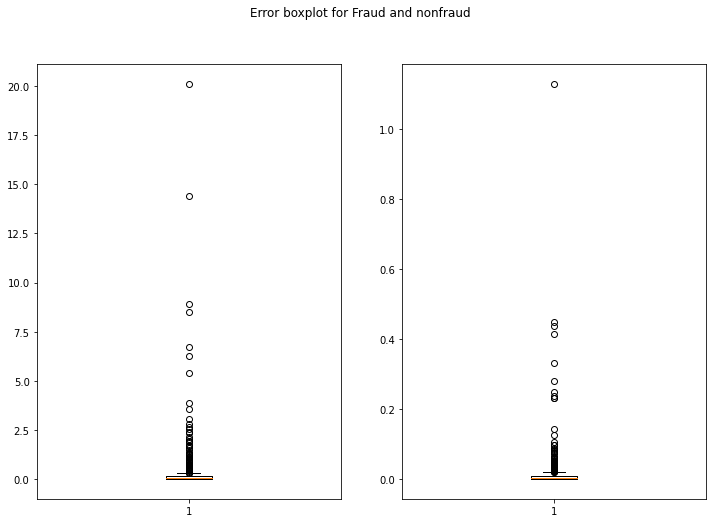

In [506]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig = plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.boxplot(errors_f)

plt.subplot(1, 2, 2)
plt.boxplot(errors_nf)

fig.suptitle('Error boxplot for Fraud and nonfraud')

## Setting threshold for metric calculations

In [507]:
threshold = 0.250003411

## Testing on unseen data

In [508]:
test_pred = autoencoder.predict(X_test)
test_pred.shape

38/38 [==============================] - 0s 1ms/step


(1188, 29)

In [509]:
recon_error = np.abs(np.subtract(test_pred, X_test[:,:29]))
recon_error.shape 

(1188, 29)

In [510]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score 

fraud = (recon_error[:,1]>threshold)
print(f'Recall = {recall_score(y_test, fraud)}')
print(f'Precision = {precision_score(y_test, fraud)}')
print(f'Accuracy = {accuracy_score(y_test, fraud)}')
print(f'F1-Score = {f1_score(y_test, fraud)}')

Recall = 0.6608478802992519
Precision = 0.8359621451104101
Accuracy = 0.8417508417508418
F1-Score = 0.7381615598885795


In [511]:
print(confusion_matrix(y_true=y_test,y_pred=fraud, labels=[1,0]))

[[265 136]
 [ 52 735]]


## Evaluation

In [512]:
predictions_eval = autoencoder.predict(X_eval[:,:29])
predictions_eval.shape

10/10 [==============================] - 0s 2ms/step


(297, 29)

In [513]:
ind_errors_eval = np.abs(np.subtract(predictions_eval, X_eval[:,:29]))
ind_errors_eval.shape

(297, 29)

In [514]:
fraud_eval = ind_errors_eval[:,1]>threshold 
print(f'Recall = {recall_score(X_eval[:,29], fraud_eval)}')
print(f'Precision = {precision_score(X_eval[:,29], fraud_eval)}')
print(f'Accuracy = {accuracy_score(X_eval[:,29], fraud_eval)}')
print(f'F1-score = {f1_score(X_eval[:,29], fraud_eval)}')


Recall = 0.6857142857142857
Precision = 0.8470588235294118
Accuracy = 0.8451178451178452
F1-score = 0.7578947368421053


In [515]:
print(confusion_matrix(y_true=X_eval[:,29], y_pred=fraud_eval, labels=[1,0]))

[[ 72  33]
 [ 13 179]]


## Predict on unseen data

In [516]:
predictions_unseen = autoencoder.predict(test_pca[:,:29])
predictions_unseen.shape

43/43 [==============================] - 0s 1ms/step


(1353, 29)

In [517]:
ind_errors_unseen = np.abs(np.subtract(predictions_unseen, test_pca[:,:29]))
ind_errors_unseen.shape

(1353, 29)

In [518]:
fraud_unseen = ind_errors_unseen[:,1]>threshold 
fraud_unseen.shape

(1353,)

In [519]:
fraud_unseen[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False])

In [520]:
pickle.dump(autoencoder, open('autoencoder_model.pkl', 'wb'))

### Adding two hidden layers to autoencoders

In [279]:
train_pca.shape

(5410, 30)

In [295]:
X_train_AE, X_test_AE = train_test_split(train_pca, test_size=0.2, random_state=2023)

X_train_AE = X_train_AE[X_train_AE[:,29]==0]
X_train_AE = X_train_AE[:,:-1] # dropping the last column 
y_test_AE = X_test_AE[:,29] 
X_test_AE = X_test_AE[:,:-1] # Dropping the last column 
#X_train_AE = X_train_AE.values 
#X_test_AE = X_test_AE.values 
X_train_AE.shape  

(3925, 29)

In [296]:
y_test_AE.shape

(1082,)

In [284]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X_train_AE.shape[1] 
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [304]:
nb_epoch = 1000
batch_size = 16 

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model.h5',
                               verbose=0,
                               save_best_only=True) 
tensorboard = TensorBoard(log_dir='./logs', #Tensorboard 
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True) 
history = autoencoder.fit(X_train_AE, X_train_AE, 
                          epochs=nb_epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test_AE, X_test_AE),
                          verbose=1,
                          callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
246/246 [==============================] - 3s 7ms/step - loss: 0.0983 - accuracy: 0.7508 - val_loss: 0.4724 - val_accuracy: 0.7662
Epoch 2/100
246/246 [==============================] - 1s 3ms/step - loss: 0.0981 - accuracy: 0.7575 - val_loss: 0.4709 - val_accuracy: 0.7625
Epoch 3/100
246/246 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.7554 - val_loss: 0.4720 - val_accuracy: 0.7523
Epoch 4/100
246/246 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.7552 - val_loss: 0.4584 - val_accuracy: 0.7699
Epoch 5/100
246/246 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.7554 - val_loss: 0.4723 - val_accuracy: 0.7579
Epoch 6/100
246/246 [==============================] - 1s 3ms/step - loss: 0.0981 - accuracy: 0.7600 - val_loss: 0.4682 - val_accuracy: 0.7717
Epoch 7/100
246/246 [==============================] - 1s 3ms/step - loss: 0.0980 - accuracy: 0.7557 - val_loss: 0.4650 - val_accuracy: 0.7708

In [305]:
# Loading the model 
autoencoder = load_model('model.h5')

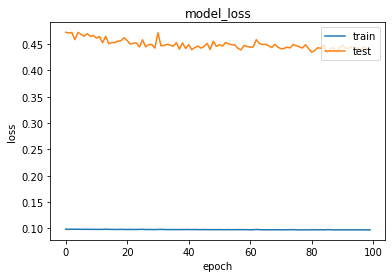

In [306]:
# Plotting training and validation loss 

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model_loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [307]:
# Predicting on test and evaluate 

predictions = autoencoder.predict(X_test_AE) 
mse = np.mean(np.power(X_test_AE - predictions, 2), axis=1)
mse.shape
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test_AE}) 

error_df.describe()

34/34 [==============================] - 0s 1ms/step


,reconstruction_error,true_class
count,1082.000000,1082.000000
mean,0.432913,0.095194
std,3.738037,0.293619
min,0.004859,0.000000
25%,0.048194,0.000000
50%,0.097323,0.000000
75%,0.132201,0.000000
max,81.426433,1.000000


In [308]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

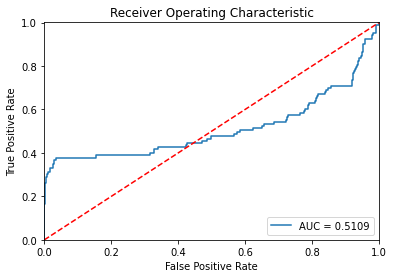

In [309]:
###ROC for errors and true class

fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

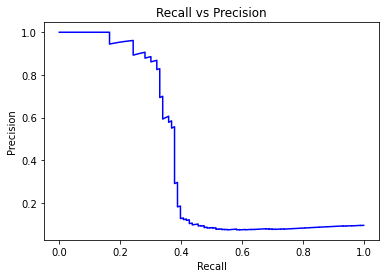

In [300]:
## Recall Vs Precision

precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

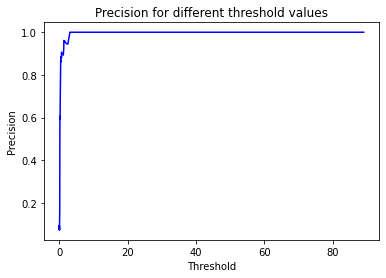

In [301]:
#Threshold Vs Precision 
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()


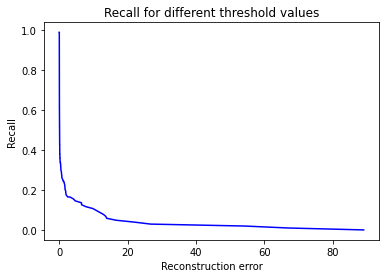

In [302]:
##Recall vs Thresold
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [316]:
threshold = 0.5

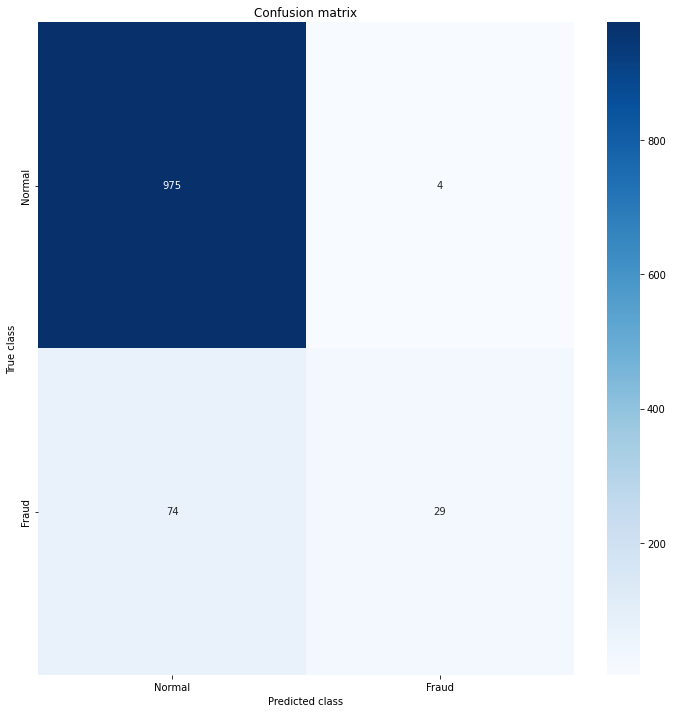

In [317]:
LABELS = ["Normal", "Fraud"] 

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred,labels=[0,1])
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap='Blues');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [318]:
print('F1_Score:',f1_score(error_df.true_class, y_pred))

F1_Score: 0.4264705882352941


# Summary

**We are able to achieve and F1-score of 0.7 on unseen data with an auto-encoder network of one dense layer and 100 epochs. Unfortunately a more sophisticated auto-encoder network of two dense layers does not yield improvement in performance. **